# Predicción de cancelación de tarjeta de cliente

## Importación de datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("../data/BankChurners.csv")

In [4]:
len(data.columns)

23

In [34]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


## Análisis y transformación de datos

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [10]:
data.dtypes.unique()

array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object)

In [11]:
data.drop(columns = ["Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1",
                     "Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2"], 
          inplace = True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [13]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [25]:
data["Attrition_Flag"].value_counts().values

array([8500, 1627], dtype=int64)

<Figure size 2880x2880 with 0 Axes>

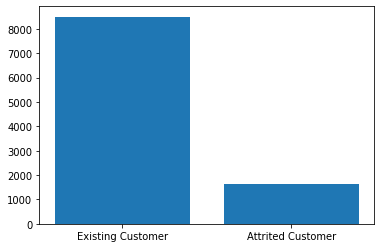

<Figure size 2880x2880 with 0 Axes>

In [31]:
plt.bar(data["Attrition_Flag"].value_counts().index, data["Attrition_Flag"].value_counts().values)
plt.figure(figsize = (40, 40))

In [32]:
data.replace({"Existing Customer":0, "Attrited Customer":1}, inplace = True)

In [33]:
data = pd.get_dummies(data)

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   CLIENTNUM                       10127 non-null  int64  
 1   Attrition_Flag                  10127 non-null  int64  
 2   Customer_Age                    10127 non-null  int64  
 3   Dependent_count                 10127 non-null  int64  
 4   Months_on_book                  10127 non-null  int64  
 5   Total_Relationship_Count        10127 non-null  int64  
 6   Months_Inactive_12_mon          10127 non-null  int64  
 7   Contacts_Count_12_mon           10127 non-null  int64  
 8   Credit_Limit                    10127 non-null  float64
 9   Total_Revolving_Bal             10127 non-null  int64  
 10  Avg_Open_To_Buy                 10127 non-null  float64
 11  Total_Amt_Chng_Q4_Q1            10127 non-null  float64
 12  Total_Trans_Amt                 

In [35]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,768805383,0,45,3,39,5,1,3,12691.0,777,...,0,0,1,0,0,0,1,0,0,0
1,818770008,0,49,5,44,6,1,2,8256.0,864,...,0,0,0,0,1,0,1,0,0,0
2,713982108,0,51,3,36,4,1,0,3418.0,0,...,0,0,0,1,0,0,1,0,0,0
3,769911858,0,40,4,34,3,4,1,3313.0,2517,...,0,0,0,0,1,0,1,0,0,0
4,709106358,0,40,3,21,5,1,0,4716.0,0,...,0,0,1,0,0,0,1,0,0,0


In [36]:
data.drop(columns = "CLIENTNUM", inplace = True)

## Dividimos entre train y test

In [37]:
x = data.drop(columns = "Attrition_Flag")
y = data["Attrition_Flag"]

In [38]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [39]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(8101, 37)
(8101,)
(2026, 37)
(2026,)


In [40]:
for col in x.columns:
    x[col] = x[col].apply(pd.to_numeric)

## Creación del modelo

In [41]:
capas = [
    keras.layers.Dense(units = 37, activation = "relu"), 
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 300, activation = "relu"),
    keras.layers.Dense(units = 400, activation = "relu"),
    keras.layers.Dense(units = 300, activation = "relu"),
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 1, activation = "sigmoid")]

In [42]:
model = keras.Sequential(capas)

In [43]:
model.compile(optimizer = "adam", 
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [44]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 32,
    epochs = 50,
    validation_split = 0.2
)

Epoch 1/50
203/203 [==============================] - 1s 4ms/step - loss: 8.8684 - accuracy: 0.7721 - val_loss: 0.5620 - val_accuracy: 0.8007
Epoch 2/50
203/203 [==============================] - 1s 3ms/step - loss: 0.6342 - accuracy: 0.8156 - val_loss: 0.5146 - val_accuracy: 0.8415
Epoch 3/50
203/203 [==============================] - 1s 3ms/step - loss: 0.4578 - accuracy: 0.8253 - val_loss: 0.3841 - val_accuracy: 0.8427
Epoch 4/50
203/203 [==============================] - 1s 3ms/step - loss: 0.4394 - accuracy: 0.8259 - val_loss: 0.3880 - val_accuracy: 0.8384
Epoch 5/50
203/203 [==============================] - 1s 3ms/step - loss: 0.4343 - accuracy: 0.8304 - val_loss: 0.4064 - val_accuracy: 0.8180
Epoch 6/50
203/203 [==============================] - 1s 3ms/step - loss: 0.4000 - accuracy: 0.8332 - val_loss: 0.3838 - val_accuracy: 0.8205
Epoch 7/50
203/203 [==============================] - 1s 3ms/step - loss: 0.4009 - accuracy: 0.8340 - val_loss: 0.3611 - val_accuracy: 0.8427
Epoch 

In [45]:
model.evaluate(xtest, ytest)

64/64 [==============================] - 0s 2ms/step - loss: 0.2451 - accuracy: 0.8968


[0.24508322775363922, 0.8968410491943359]

## Mejora del modelo

#### Vamos a ver si podemos mejorar el score de este modelo

## Transformación de datos

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
x

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,...,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,45,3,39,5,1,3,12691.0,777,11914.0,1.335,...,0,0,1,0,0,0,1,0,0,0
1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,...,0,0,0,0,1,0,1,0,0,0
2,51,3,36,4,1,0,3418.0,0,3418.0,2.594,...,0,0,0,1,0,0,1,0,0,0
3,40,4,34,3,4,1,3313.0,2517,796.0,1.405,...,0,0,0,0,1,0,1,0,0,0
4,40,3,21,5,1,0,4716.0,0,4716.0,2.175,...,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,50,2,40,3,2,3,4003.0,1851,2152.0,0.703,...,0,1,0,0,0,0,1,0,0,0
10123,41,2,25,4,2,3,4277.0,2186,2091.0,0.804,...,0,1,0,0,0,0,1,0,0,0
10124,44,1,36,5,3,4,5409.0,0,5409.0,0.819,...,0,0,0,0,1,0,1,0,0,0
10125,30,2,36,4,3,3,5281.0,0,5281.0,0.535,...,0,1,0,0,0,0,1,0,0,0


In [48]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [49]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.2, shuffle = True, random_state=2)

In [52]:
capas = [
    keras.layers.Dense(units = 37, activation = "relu"), 
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 300, activation = "relu"),
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 1, activation = "sigmoid")]
model = keras.Sequential(capas)
model.compile(optimizer = "adam", 
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [53]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 32,
    epochs = 50,
    validation_split = 0.2
)

Epoch 1/50
203/203 [==============================] - 1s 3ms/step - loss: 0.3300 - accuracy: 0.8756 - val_loss: 0.2597 - val_accuracy: 0.8933
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.2433 - accuracy: 0.9028 - val_loss: 0.2336 - val_accuracy: 0.8988
Epoch 3/50
203/203 [==============================] - 0s 2ms/step - loss: 0.2084 - accuracy: 0.9150 - val_loss: 0.2293 - val_accuracy: 0.8994
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1763 - accuracy: 0.9273 - val_loss: 0.2183 - val_accuracy: 0.9099
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1567 - accuracy: 0.9367 - val_loss: 0.2304 - val_accuracy: 0.9056
Epoch 6/50
203/203 [==============================] - 1s 3ms/step - loss: 0.1405 - accuracy: 0.9398 - val_loss: 0.2181 - val_accuracy: 0.9124
Epoch 7/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1247 - accuracy: 0.9492 - val_loss: 0.2280 - val_accuracy: 0.9112
Epoch 

In [54]:
model.evaluate(xtest, ytest)

64/64 [==============================] - 0s 2ms/step - loss: 0.8395 - accuracy: 0.9210


[0.8394904732704163, 0.9210266470909119]

In [55]:
x.shape

(10127, 37)

#### Vemos que los datos están desbalanceados

In [56]:
y.value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [57]:
from imblearn.under_sampling import NearMiss

In [58]:
nm = NearMiss()
xtrainRes, ytrainRes= nm.fit_resample(xtrain, ytrain)

In [59]:
xtrainRes.shape

(2630, 37)

In [60]:
ytrainRes.shape

(2630,)

In [62]:
capas = [
    keras.layers.Dense(units = 37, activation = "relu"), 
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 300, activation = "relu"),
    keras.layers.Dense(units = 150, activation = "relu"),
    keras.layers.Dense(units = 1, activation = "sigmoid")]
model = keras.Sequential(capas)
model.compile(optimizer = "adam", 
              loss = "binary_crossentropy",
              metrics = ["accuracy"])

In [63]:
history = model.fit(
    xtrain,
    ytrain,
    batch_size = 32,
    epochs = 50,
    validation_split = 0.2
)

Epoch 1/50
203/203 [==============================] - 1s 3ms/step - loss: 0.3058 - accuracy: 0.8806 - val_loss: 0.2532 - val_accuracy: 0.8970
Epoch 2/50
203/203 [==============================] - 0s 2ms/step - loss: 0.2277 - accuracy: 0.9048 - val_loss: 0.2365 - val_accuracy: 0.9013
Epoch 3/50
203/203 [==============================] - 1s 3ms/step - loss: 0.1974 - accuracy: 0.9187 - val_loss: 0.2289 - val_accuracy: 0.9056
Epoch 4/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1696 - accuracy: 0.9304 - val_loss: 0.2397 - val_accuracy: 0.9075
Epoch 5/50
203/203 [==============================] - 0s 2ms/step - loss: 0.1548 - accuracy: 0.9386 - val_loss: 0.2258 - val_accuracy: 0.9062
Epoch 6/50
203/203 [==============================] - 1s 3ms/step - loss: 0.1452 - accuracy: 0.9372 - val_loss: 0.2475 - val_accuracy: 0.9099
Epoch 7/50
203/203 [==============================] - 1s 3ms/step - loss: 0.1215 - accuracy: 0.9477 - val_loss: 0.2334 - val_accuracy: 0.9124
Epoch 

In [64]:
model.evaluate(xtest, ytest)

64/64 [==============================] - 0s 2ms/step - loss: 0.9901 - accuracy: 0.9112


[0.9900861382484436, 0.9111549854278564]

#### Parece que no hemos podido llegar a un mejor modelo. Tal vez la razón es simplemente inherente al caso del que estamos tratando, saber si alguien va a cancerlar o no una tarjeta. Hay cierto punto en el que no podemos obtener más precisión a la hora de saber si alguien va o no a cancelar una tarjeta.

In [65]:
from sklearn import metrics

In [66]:
import seaborn as sns
import numpy as np

## Evaluación del modelo

64/64 [==============================] - 0s 1ms/step


<AxesSubplot:>

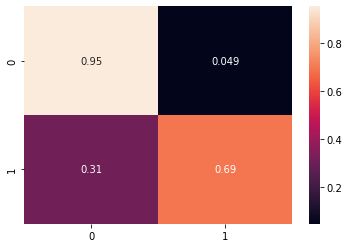

In [67]:
sns.heatmap(metrics.confusion_matrix(ytest, np.round(model.predict(xtest)), normalize = "true"), annot = True)

In [193]:
metrics.recall_score(ytest, np.round(model.predict(xtest)))

64/64 [==============================] - 0s 1ms/step


0.6762820512820513

In [194]:
metrics.precision_score(ytest, np.round(model.predict(xtest)))

64/64 [==============================] - 0s 1ms/step


0.7152542372881356